In [40]:
using KomaMRI, MAT, Plots, WebIO

In [41]:
# Importing MATLAB data
RF_Hz = matread("/Users/amandanicotina/Documents/Julia/Projects/KomaMRIScripts/OC_Grape/OC_fields/oc_field.mat")["b1"];
t_sp = matread("/Users/amandanicotina/Documents/Julia/Projects/KomaMRIScripts/OC_Grape/OC_fields/oc_field.mat")["t_s"];
Mmax = matread("/Users/amandanicotina/Documents/Julia/Projects/KomaMRIScripts/OC_Grape/OC_fields/oc_field.mat")["Mmax"];
Mmin = matread("/Users/amandanicotina/Documents/Julia/Projects/KomaMRIScripts/OC_Grape/OC_fields/oc_field.mat")["Mmin"];

## Implementation Optimized Shaped Pulse

Sample A: T1 = 100ms and T2 = 50ms \
Sample B: T1 = 50ms and T2 = 25ms

### Scanner

In [42]:
sys = Scanner();

### Sequence

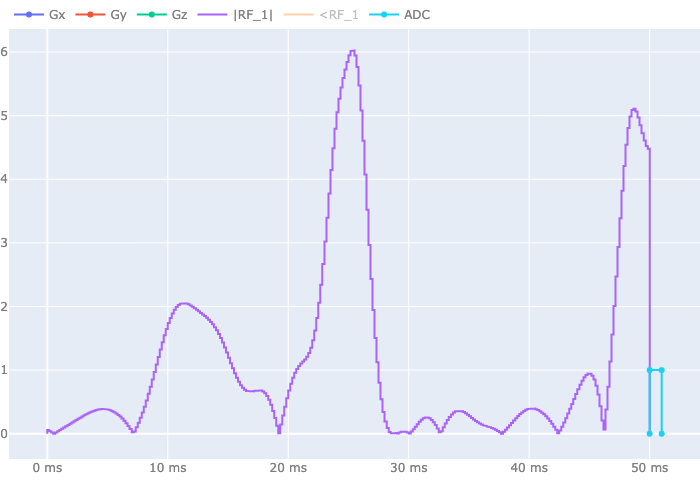

In [43]:
# convert to Tesla
RF_T = RF_Hz/γ

# 1st block -> RF block
exc = RF(RF_T', t_sp);

# 2nd block -> ADC block
nADC = 1 ;
durADC = 1e-3 ;
#delay = 1e-3 ;
aqc = ADC(nADC, durADC)

# concatenating the two blocks
seq  = Sequence()
seq += exc
seq += aqc

# plot
p1 = plot_seq(seq; slider = false, height = 300, max_rf_samples=Inf);
    

### Phantom

In [44]:
obj = Phantom{Float64}(name = "spin1", x = [0.], T1 = [50e-3], T2 = [25e-3]);

### Simulate

In [45]:
raw = simulate(obj, seq, sys; simParams=Dict{String,Any}("return_type"=>"raw"));
p2 = plot_signal(raw; slider = false, height = 300);

signal = simulate(obj, seq, sys; simParams=Dict{String,Any}("return_type"=>"state"));
Mx = real(signal.xy)[];
My = real(signal.xy)[];
Mz = real(signal.z)[];

  0.046927 seconds (196.67 k allocations: 9.471 MiB)


┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.7.3
│   sim_method = KomaMRI.Bloch()
│   spins = 1
│   time_points = 1002
│   adc_points = 1
└ @ KomaMRI /Users/amandanicotina/.julia/packages/KomaMRI/qZTLv/src/simulation/SimulatorCore.jl:219
┌ Info: Running simulation in the CPU with 1 thread(s)
│   koma_version = 0.7.3
│   sim_method = KomaMRI.Bloch()
│   spins = 1
│   time_points = 1002
│   adc_points = 1
└ @ KomaMRI /Users/amandanicotina/.julia/packages/KomaMRI/qZTLv/src/simulation/SimulatorCore.jl:219


  0.045993 seconds (196.74 k allocations: 9.479 MiB)


### Calculating the fidelity

In [46]:
sig = "min"

# Fidelity
if sig == "max"
    Mxmax = Mmax[2, end]
    Mymax = Mmax[3, end]
    Mzmax = Mmax[4, end]
    fidelity_Mx = round(abs(Mx - Mxmax)*100, digits = 2)
    fidelity_My = round(abs(My - Mymax)*100, digits = 2)
    fidelity_Mz = round(abs(Mz - Mzmax)*100, digits = 2)
else 
    Mxmin = Mmin[2, end]
    Mymin = Mmin[3, end]
    Mzmin = Mmin[4, end]
    fidelity_Mx = round(abs(Mx - Mxmin)*100, digits = 2)
    fidelity_My = round(abs(My - Mymin)*100, digits = 2)
    fidelity_Mz = round(abs(Mz - Mzmin)*100, digits = 2)
end

println("Fidelity: Mx = $fidelity_Mx%, My = $fidelity_My%, Mz = $fidelity_Mz%")

Fidelity: Mx = 0.0%, My = 0.16%, Mz = 1.13%
